In [1]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn import linear_model
import warnings
import seaborn as sns
import matplotlib
from tensorflow.keras import regularizers
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.image as mpimg
from matplotlib import colors
from os import listdir
from numpy import asarray
from numpy import vstack
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from numpy import savez_compressed
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy import load
from numpy import zeros
from numpy import ones
import tensorflow as tf
from numpy.random import randint
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LeakyReLU, BatchNormalization, Dropout, Concatenate, Activation, LeakyReLU, Conv2DTranspose
from tensorflow.keras.layers import Conv2D
from matplotlib import pyplot
warnings.filterwarnings(action='once')

In [2]:
# load all images in a directory into memory
def load_images(path, size=(64,128)):
    src_list, tar_list = list(), list()
    # enumerate filenames in directory, assume all are images
    for filename in listdir(path):
        # load and resize the image
        pixels = pd.read_csv(path + filename,header=None)
        # convert to numpy array
        pixels = img_to_array(pixels)
        # split into satellite and map
        sat_img, map_img = pixels[:, :64], pixels[:, 64:]
        src_list.append(sat_img)
        tar_list.append(map_img)
    return [asarray(src_list), asarray(tar_list)]
 
# dataset path
path = 'data/metallic_train/'
# load dataset
[src_images, tar_images] = load_images(path)
print('Loaded: ', src_images.shape, tar_images.shape)
# save as compressed numpy array
filename = 'data_256_metallic.npz'
savez_compressed(filename, src_images, tar_images)
print('Saved dataset: ', filename)


Loaded:  (288, 64, 64, 1) (288, 64, 64, 1)
Saved dataset:  data_256_metallic.npz


In [3]:
# dataset validation path
path = 'data/raw_validation_data_metallic/'
# load dataset
[src_images, tar_images] = load_images(path)
print('Loaded: ', src_images.shape, tar_images.shape)
# save as compressed numpy array
filename = 'val_256_metallic.npz'
savez_compressed(filename, src_images, tar_images)
print('Saved dataset: ', filename)

Loaded:  (32, 64, 64, 1) (32, 64, 64, 1)
Saved dataset:  val_256_metallic.npz


Loaded:  (288, 64, 64) (288, 64, 64)


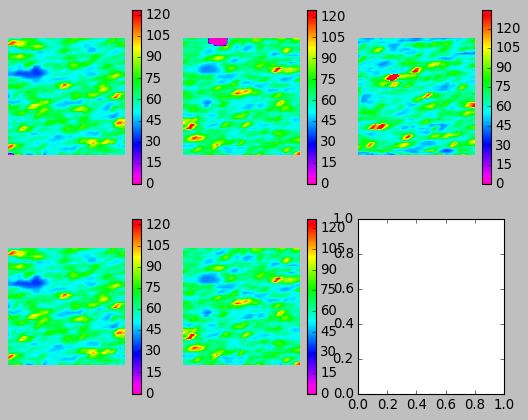

In [4]:
# load the prepared dataset
from numpy import load
from matplotlib import pyplot
# load the dataset
data = load('data_256_metallic.npz')
src_images, tar_images = data['arr_0'], data['arr_1']
src_images = np.squeeze(src_images)
tar_images = np.squeeze(tar_images)
print('Loaded: ', src_images.shape, tar_images.shape)
# plot source images
n_samples = 3
for i in range(n_samples):
    vmin = min(pd.DataFrame(src_images[i]))
    vmax = max(pd.DataFrame(src_images[i]))
    sigma =  np.std(src_images[i])
    miu= np.mean(src_images[i])
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    plt.style.use('classic')    
    color_map = plt.cm.get_cmap('gist_rainbow').reversed()
    imgplot = plt.imshow(src_images[i], cmap=plt.cm.get_cmap(name=color_map), norm=norm, aspect=None, interpolation=None, alpha=None,
                     vmin=0, vmax=miu*2, origin=None, extent=None,filternorm=True,
                     filterrad=4.0)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.colorbar() 
    pyplot.subplot(2, n_samples, 1 + i)
    
# plot target image
for i in range(n_samples):
    vmin = min(pd.DataFrame(tar_images[i]))
    vmax = max(pd.DataFrame(tar_images[i]))
    sigma =  np.std(tar_images[i])
    miu= np.mean(tar_images[i])
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    plt.style.use('classic')    
    color_map = plt.cm.get_cmap('gist_rainbow').reversed()
    imgplot = plt.imshow(tar_images[i], cmap=plt.cm.get_cmap(name=color_map), norm=norm, aspect=None, interpolation=None, alpha=None,
                     vmin=0, vmax=miu*2, origin=None, extent=None,filternorm=True,
                     filterrad=4.0)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.colorbar() 
    pyplot.subplot(2, n_samples,  n_samples + i+1)
     

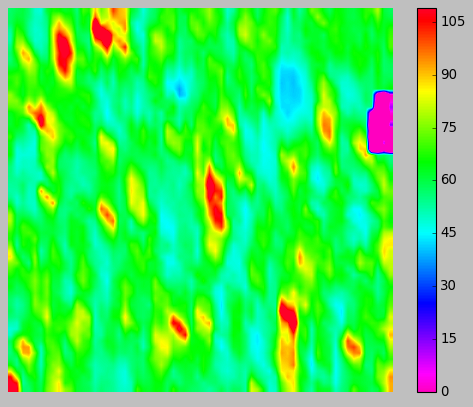

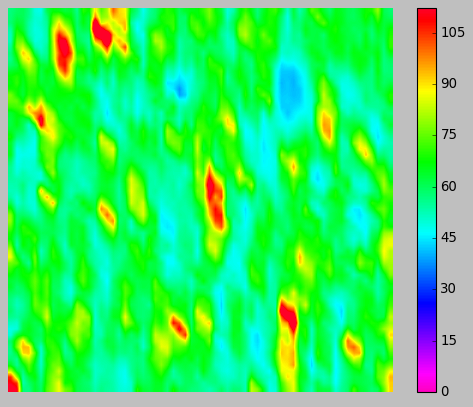

In [5]:
i=5
vmin = min(pd.DataFrame(src_images[i]))
vmax = max(pd.DataFrame(src_images[i]))
sigma =  np.std(src_images[i])
miu= np.mean(src_images[i])
norm = colors.Normalize(vmin=vmin, vmax=vmax)
plt.style.use('classic')    
color_map = plt.cm.get_cmap('gist_rainbow').reversed()
imgplot = plt.imshow(src_images[i+24], cmap=plt.cm.get_cmap(name=color_map), norm=norm, aspect=None, interpolation=None, alpha=None,
                     vmin=0, vmax=miu*2, origin=None, extent=None,filternorm=True,
                     filterrad=4.0)
plt.gca().invert_yaxis()
plt.axis('off')
plt.colorbar()
plt.show()

vmin = min(pd.DataFrame(tar_images[i]))
vmax = max(pd.DataFrame(tar_images[i]))
sigma =  np.std(tar_images[i])
miu= np.mean(tar_images[i])
norm = colors.Normalize(vmin=vmin, vmax=vmax)
plt.style.use('classic')    
color_map = plt.cm.get_cmap('gist_rainbow').reversed()
imgplot = plt.imshow(tar_images[i+24], cmap=plt.cm.get_cmap(name=color_map), norm=norm, aspect=None, interpolation=None, alpha=None,
                     vmin=0, vmax=miu*2, origin=None, extent=None,filternorm=True,
                     filterrad=4.0)
plt.gca().invert_yaxis()
plt.axis('off')
plt.colorbar()
plt.show()

Loaded (288, 64, 64, 1) (288, 64, 64, 1)
image_shape [64 64  1]
>1, d1[0.420] d2[0.474] g[47.996]
>2, d1[0.350] d2[0.467] g[44.877]
>3, d1[0.340] d2[0.424] g[43.732]
>4, d1[0.336] d2[0.401] g[40.863]
>5, d1[0.329] d2[0.380] g[40.424]
>6, d1[0.321] d2[0.368] g[38.655]
>7, d1[0.334] d2[0.354] g[36.505]
>8, d1[0.327] d2[0.346] g[34.466]
>9, d1[0.319] d2[0.343] g[33.444]
X_realA[i] (64, 64, 1)
X_realA[i] (64, 64, 1)
X_realA[i] (64, 64, 1)
>Saved: plot_000009.png and model_000009.h5
>10, d1[0.321] d2[0.316] g[32.390]
>11, d1[0.328] d2[0.320] g[31.202]
>12, d1[0.324] d2[0.317] g[28.889]
>13, d1[0.313] d2[0.302] g[28.224]
>14, d1[0.297] d2[0.287] g[28.515]
>15, d1[0.291] d2[0.279] g[27.437]
>16, d1[0.315] d2[0.278] g[26.245]
>17, d1[0.310] d2[0.288] g[27.351]
>18, d1[0.251] d2[0.277] g[24.230]
X_realA[i] (64, 64, 1)
X_realA[i] (64, 64, 1)
X_realA[i] (64, 64, 1)
>Saved: plot_000018.png and model_000018.h5
>19, d1[0.274] d2[0.281] g[22.989]
>20, d1[0.258] d2[0.267] g[23.513]
>21, d1[0.254] d2[0

>Saved: plot_000126.png and model_000126.h5
>127, d1[0.044] d2[0.034] g[10.807]
>128, d1[0.033] d2[0.037] g[10.328]
>129, d1[0.044] d2[0.040] g[9.367]
>130, d1[0.087] d2[0.055] g[9.202]
>131, d1[0.039] d2[0.029] g[10.429]
>132, d1[0.033] d2[0.033] g[10.194]
>133, d1[0.054] d2[0.068] g[9.463]
>134, d1[0.031] d2[0.027] g[10.119]
>135, d1[0.031] d2[0.022] g[9.402]
X_realA[i] (64, 64, 1)
X_realA[i] (64, 64, 1)
X_realA[i] (64, 64, 1)
>Saved: plot_000135.png and model_000135.h5
>136, d1[0.072] d2[0.068] g[10.491]
>137, d1[0.034] d2[0.025] g[9.835]
>138, d1[0.048] d2[0.032] g[8.960]
>139, d1[0.098] d2[0.087] g[10.005]
>140, d1[0.060] d2[0.038] g[9.292]
>141, d1[0.041] d2[0.021] g[8.363]
>142, d1[0.043] d2[0.073] g[9.418]
>143, d1[0.049] d2[0.034] g[9.584]
>144, d1[0.030] d2[0.036] g[12.124]
X_realA[i] (64, 64, 1)
X_realA[i] (64, 64, 1)
X_realA[i] (64, 64, 1)
>Saved: plot_000144.png and model_000144.h5
>145, d1[0.026] d2[0.022] g[10.064]
>146, d1[0.051] d2[0.091] g[9.342]
>147, d1[0.083] d2[0.

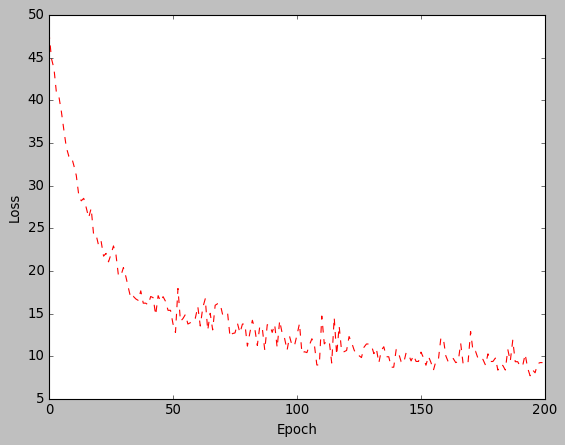

In [12]:
# define the discriminator model
def define_discriminator(image_shape):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # source image input
    in_src_image = Input(shape=image_shape)
    # target image input
    in_target_image = Input(shape=image_shape)
    # concatenate images channel-wise
    merged = Concatenate()([in_src_image, in_target_image])
    # C64
    d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
    d = LeakyReLU(alpha=0.2)(d)
    # C128
    d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # C256
    d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # second last output layer
    d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # patch output
    d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
    patch_out = Activation('sigmoid')(d)
    # define model
    model = Model([in_src_image, in_target_image], patch_out)
    # compile model
    opt = Adam(lr=0.0001, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
    return model
 
# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # add downsampling layer
    g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
    # conditionally add batch normalization
    if batchnorm:
        g = BatchNormalization()(g, training=True)
    # leaky relu activation
    g = LeakyReLU(alpha=0.2)(g)
    return g
 
# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # add upsampling layer
    g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
    # add batch normalization
    g = BatchNormalization()(g, training=True)
    # conditionally add dropout
    if dropout:
        g = Dropout(0.5)(g, training=True)
    # merge with skip connection
    g = Concatenate()([g, skip_in])
    # relu activation
    g = Activation('relu')(g)
    return g
 
# define the standalone generator model
def define_generator(image_shape=(256,256,1)):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # image input
    in_image = Input(shape=image_shape)
    # encoder model
    e1 = define_encoder_block(in_image, 64, batchnorm=False)
    e2 = define_encoder_block(e1, 128)
    e3 = define_encoder_block(e2, 256)
    e4 = define_encoder_block(e3, 512)
    e5 = define_encoder_block(e4, 512)
    
    # bottleneck, no batch norm and relu
    b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e5)
    b = Activation('relu')(b)
    # decoder model
    
    d3 = decoder_block(b, e5, 512)
    d4 = decoder_block(d3, e4, 512, dropout=False)
    d5 = decoder_block(d4, e3, 256, dropout=False)
    d6 = decoder_block(d5, e2, 128, dropout=False)
    d7 = decoder_block(d6, e1, 64, dropout=False)
    # output
    g = Conv2DTranspose(1, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
    out_image = Activation('tanh')(g)
    # define model
    model = Model(in_image, out_image)
    return model
 
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model, image_shape):
    # make weights in the discriminator not trainable
    d_model.trainable = False
    # define the source image
    in_src = Input(shape=image_shape)
    # connect the source image to the generator input
    gen_out = g_model(in_src)
    # connect the source input and generator output to the discriminator input
    dis_out = d_model([in_src, gen_out])
    # src image as input, generated image and classification output
    model = Model(in_src, [dis_out, gen_out])
    # compile model
    opt = Adam(lr=0.0001, beta_1=0.5)
    model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
    return model
 
# load and prepare training images
def load_real_samples(filename):
    # load compressed arrays
    data = load(filename)
    # unpack arrays
    X1, X2 = data['arr_0'], data['arr_1']
    # scale from [0,255] to [-1,1]
    X1 = (X1 - 127.5) / 127.5
    X2 = (X2 - 127.5) / 127.5
    return [X1, X2]
 
# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
    # unpack dataset
    trainA, trainB = dataset
    # choose random instances
    ix = randint(0, trainA.shape[0], n_samples)
    # retrieve selected images
    X1, X2 = trainA[ix], trainB[ix]
    # generate 'real' class labels (1)
    y = ones((n_samples, patch_shape, patch_shape, 1))
    return [X1, X2], y
 
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
    # generate fake instance
    X = g_model.predict(samples)
    # create 'fake' class labels (0)
    y = zeros((len(X), patch_shape, patch_shape, 1))
    return X, y
 
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, dataset, n_samples=3):
    # select a sample of input images
    [X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
    # generate a batch of fake samples
    X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
    # scale all pixels from [-1,1] to [0,1]
    X_realA = (X_realA + 1) / 2.0
    X_realB = (X_realB + 1) / 2.0
    X_fakeB = (X_fakeB + 1) / 2.0
    # plot real source images
    for i in range(n_samples):
        vmin = np.min(X_realA[i].any())
        vmax = np.max(X_realA[i].any())
        print('X_realA[i]', X_realA[i].shape)
        norm = colors.Normalize(vmin=vmin, vmax=vmax)
        plt.style.use('classic')    
        color_map = plt.cm.get_cmap('gist_rainbow').reversed()
        imgplot = plt.imshow(X_realA[i][:,:,0], cmap=plt.cm.get_cmap(name=color_map), norm=norm, aspect=None, interpolation=None, alpha=None,
                             vmin=0, vmax=vmax, origin=None, extent=None,filternorm=True,
                             filterrad=4.0)
        plt.colorbar()
        plt.gca().invert_yaxis()
        pyplot.subplot(3, n_samples, 1 + i)
        pyplot.axis('off')
    # plot generated target image
    for i in range(n_samples):
        vmin = np.min(X_fakeB[i].any())
        vmax = np.max(X_fakeB[i].any())
        norm = colors.Normalize(vmin=vmin, vmax=vmax)
        plt.style.use('classic')    
        color_map = plt.cm.get_cmap('gist_rainbow').reversed()
        imgplot = plt.imshow(X_fakeB[i][:,:,0], cmap=plt.cm.get_cmap(name=color_map), norm=norm, aspect=None, interpolation=None, alpha=None,
                             vmin=0, vmax=vmax, origin=None, extent=None,filternorm=True,
                             filterrad=4.0)
        plt.colorbar()
        plt.gca().invert_yaxis()
        pyplot.subplot(3, n_samples, 1 + n_samples + i)
        pyplot.axis('off')
    # plot real target image
    for i in range(n_samples):
        vmin = np.min(X_realB[i].any())
        vmax = np.max(X_realB[i].any())
        norm = colors.Normalize(vmin=vmin, vmax=vmax)
        plt.style.use('classic')    
        color_map = plt.cm.get_cmap('gist_rainbow').reversed()
        imgplot = plt.imshow(X_realB[i][:,:,0], cmap=plt.cm.get_cmap(name=color_map), norm=norm, aspect=None, interpolation=None, alpha=None,
                             vmin=0, vmax=vmax, origin=None, extent=None,filternorm=True,
                             filterrad=4.0)
        plt.colorbar()
        plt.gca().invert_yaxis()
        pyplot.subplot(3, n_samples, 1 + n_samples*2 + i)
        pyplot.axis('off')
    # save plot to file
    filename1 = 'plot_%06d.png' % (step+1)
    pyplot.savefig(filename1)
    pyplot.close()
    # save the generator model
    filename2 = 'model_%06d.h5' % (step+1)
    g_model.save(filename2)
    print('>Saved: %s and %s' % (filename1, filename2))
 
# train pix2pix models
def train(d_model, g_model, gan_model, dataset, n_epochs=20, n_batch=32):
    # determine the output square shape of the discriminator
    n_patch = d_model.output_shape[1]
    # unpack dataset
    trainA, trainB = dataset
    # calculate the number of batches per training epoch
    bat_per_epo = int(len(trainA) / n_batch)
    # calculate the number of training iterations
    n_steps = bat_per_epo * n_epochs
    d_loss1plot = []
    d_loss2plot = []
    g_lossplot = []
    # manually enumerate epochs
    for i in range(n_steps):
        # select a batch of real samples
        [X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
        # generate a batch of fake samples
        X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
        # update discriminator for real samples
        d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
        
        # update discriminator for generated samples
        d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
        
        # update the generator
        g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
        g_lossplot.append(g_loss)
        # summarize performance
        print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
        # summarize model performance
        if (i+1) % (bat_per_epo * 1) == 0:
            summarize_performance(i, g_model, dataset)
            d_loss1plot.append(d_loss1)
            d_loss2plot.append(d_loss2)
            g_lossplot.append(g_loss)
    plt.plot(np.arange(0,len(g_lossplot),1), g_lossplot, 'r--')
    plt.xlabel('Epoch ')
    plt.ylabel('Loss')
    plt.show()   
 
# load image data
dataset = load_real_samples('data_256_metallic.npz')
print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
image_shape=np.squeeze(image_shape)
print('image_shape',image_shape)
# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)
# train model
train(d_model, g_model, gan_model, dataset)

In [ ]:
from numpy import load
# load and prepare training images
def load_real_samples(filename):
	# load compressed ararys
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

In [37]:
# load dataset
[X1, X2] = load_real_samples('val_256_metallic.npz')
print('Loaded', X1.shape, X2.shape)


Loaded (32, 64, 64, 1) (32, 64, 64, 1)


In [38]:
from tensorflow.keras.models import load_model
# load model
model = load_model('model_005760.h5')

In [39]:
from numpy.random import randint
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
src_image.shape

(1, 64, 64, 1)

(1, 256, 256, 1)
(1, 256, 256, 1)


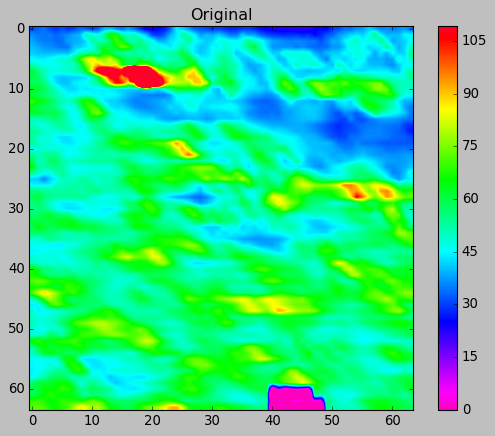

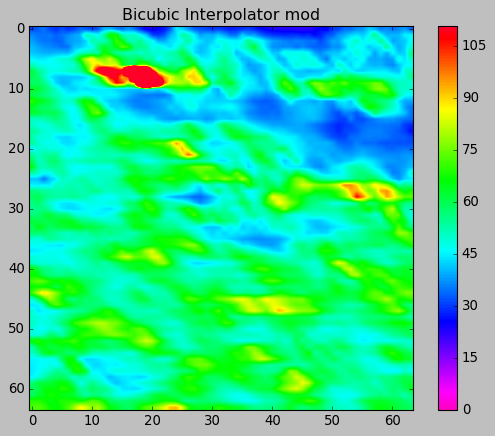

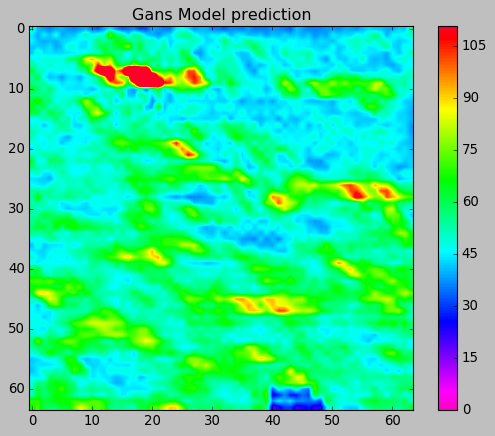

In [40]:
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot
import matplotlib.image as mpimg

# generate image from source)
#original reconstruction
original = np.reshape(X1[0:16].squeeze(), (1,256,256,1))
print(original.shape)

# target reconstruction
target = np.reshape(X2[0:16].squeeze(), (1,256,256,1))
print(target.shape)

# pred reconstruction
gen_image = model.predict(src_image)
prediction = model.predict(X1)

prediction.shape
prediction[1].shape
pred = np.reshape(prediction[8].squeeze(), (64,64))


original = np.reshape(X1[8].squeeze()*127.5 + 127.5, (64,64))
vmin = np.min(original.any())
vmax = np.max(original.any())
sigma =  np.std(original)
miu= np.mean(original)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
plt.style.use('classic')    
color_map = plt.cm.get_cmap('gist_rainbow').reversed()
pyplot.imshow(original, cmap=plt.cm.get_cmap(name=color_map), norm=norm, aspect=None, interpolation=None, alpha=None,
                             vmin=0, vmax=miu*2, origin='bottom', extent=None,filternorm=True,
                             filterrad=4.0)
plt.title('Original')
plt.colorbar()
plt.gca().invert_yaxis()
pyplot.show()

original2 = np.reshape(X2[8].squeeze()*127.5 + 127.5, (64,64))
vmin = np.min(original2.any())
vmax = np.max(original2.any())
sigma =  np.std(original2)
miu= np.mean(original2)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
plt.style.use('classic')    
color_map = plt.cm.get_cmap('gist_rainbow').reversed()
pyplot.imshow(original2, cmap=plt.cm.get_cmap(name=color_map), norm=norm, aspect=None, interpolation=None, alpha=None,
                             vmin=0, vmax=miu*2, origin='bottom', extent=None,filternorm=True,
                             filterrad=4.0)
plt.title('Bicubic Interpolator mod')
plt.colorbar()
plt.gca().invert_yaxis()
pyplot.show()
pred = np.reshape(pred.squeeze()*127.5 + 127.5, (64,64))
vmin = np.min(pred.any())
vmax = np.max(pred.any())
sigma =  np.std(pred)
miu= np.mean(pred)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
plt.style.use('classic')    
color_map = plt.cm.get_cmap('gist_rainbow').reversed()
pyplot.imshow(pred, cmap=plt.cm.get_cmap(name=color_map), norm=norm, aspect=None, interpolation=None, alpha=None,
                             vmin=0, vmax=miu*2, origin='bottom', extent=None,filternorm=True,
                             filterrad=4.0)
plt.title('Gans Model prediction')
plt.colorbar()
plt.gca().invert_yaxis()
pyplot.show()


In [41]:
from sklearn import preprocessing
full = np.empty([256,256])
full[:64,:64] = prediction[0,:,:,0] #row 1 0:63
full[:64,64:128] = prediction[8,:,:,0] #Row 1 64:128
full[:64,128:192] = prediction[9,:,:,0]#Row 1 128:192
full[:64,192:256] = prediction[10,:,:,0]#Row 1 192:256

full[64:128,:64] = prediction[11,:,:,0]#row 2 0-63
full[64:128,64:128] = prediction[12,:,:,0]#row 2 64:128
full[64:128,128:192] = prediction[13,:,:,0]#row 2 128:192
full[64:128,192:256] = prediction[14,:,:,0]#row 2 192:256

full[128:192,:64] = prediction[15,:,:,0]#row 3 0-63
full[128:192,64:128] = prediction[1,:,:,0]#row 3 64:128
full[128:192,128:192] = prediction[2,:,:,0]#row 3 128:192
full[128:192,192:256] = prediction[3,:,:,0]#row 3 192:256

full[192:256,:64] = prediction[4,:,:,0]#row 4 0-63
full[192:256,64:128] = prediction[5,:,:,0]#row 4 64:128
full[192:256,128:192] = prediction[6,:,:,0]#row 4 128:192
full[192:256,192:256] = prediction[7,:,:,0]#row 4 192:256

full=pd.DataFrame(full)*127.5 +127.5
full.to_csv(r'C:\Users\gbian007\Google Drive\Research\ModMap\data\Analysis\pred1.csv',header=False,index=False)

#x = full.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#full = pd.DataFrame(x_scaled)
#full.values.max()
#hist = full.hist(bins=3)
#hist

In [42]:
fullog = np.empty([256,256])
fullog[:64,:64] = np.reshape(X1[0].squeeze(), (64,64)) #row 1 0:63
fullog[:64,64:128] = np.reshape(X1[8].squeeze(), (64,64)) #Row 1 64:128
fullog[:64,128:192] = np.reshape(X1[9].squeeze(), (64,64)) #Row 1 128:192
fullog[:64,192:256] = np.reshape(X1[10].squeeze(), (64,64)) #Row 1 192:256

fullog[64:128,:64] = np.reshape(X1[11].squeeze(), (64,64)) #row 2 0-63
fullog[64:128,64:128] = np.reshape(X1[12].squeeze(), (64,64)) #row 2 64:128
fullog[64:128,128:192] = np.reshape(X1[13].squeeze(), (64,64)) #row 2 128:192
fullog[64:128,192:256] = np.reshape(X1[14].squeeze(), (64,64)) #row 2 192:256

fullog[128:192,:64] = np.reshape(X1[15].squeeze(), (64,64)) #row 3 0-63
fullog[128:192,64:128] = np.reshape(X1[1].squeeze(), (64,64)) #row 3 64:128
fullog[128:192,128:192] = np.reshape(X1[2].squeeze(), (64,64)) #row 3 128:192
fullog[128:192,192:256] = np.reshape(X1[3].squeeze(), (64,64)) #row 3 192:256

fullog[192:256,:64] = np.reshape(X1[4].squeeze(), (64,64)) #row 4 0-63
fullog[192:256,64:128] = np.reshape(X1[5].squeeze(), (64,64)) #row 4 64:128
fullog[192:256,128:192] = np.reshape(X1[6].squeeze(), (64,64)) #row 4 128:192
fullog[192:256,192:256] = np.reshape(X1[7].squeeze(), (64,64)) #row 4 192:256

fullog=pd.DataFrame(fullog)*127.5 +127.5
fullog.to_csv(r'C:\Users\gbian007\Google Drive\Research\ModMap\data\Analysis\fullog1.csv',header=False,index=False)

#x = fullog.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#fullog = pd.DataFrame(x_scaled)
#fullog.values.max()
#fullog

In [43]:
fulltar = np.empty([256,256])
fulltar[:64,:64] = np.reshape(X2[0].squeeze(), (64,64)) #row 1 0:63
fulltar[:64,64:128] = np.reshape(X2[8].squeeze(), (64,64)) #Row 1 64:128
fulltar[:64,128:192] = np.reshape(X2[9].squeeze(), (64,64)) #Row 1 128:192
fulltar[:64,192:256] = np.reshape(X2[10].squeeze(), (64,64)) #Row 1 192:256

fulltar[64:128,:64] = np.reshape(X2[11].squeeze(), (64,64)) #row 2 0-63
fulltar[64:128,64:128] = np.reshape(X2[12].squeeze(), (64,64)) #row 2 64:128
fulltar[64:128,128:192] = np.reshape(X2[13].squeeze(), (64,64)) #row 2 128:192
fulltar[64:128,192:256] = np.reshape(X2[14].squeeze(), (64,64)) #row 2 192:256

fulltar[128:192,:64] = np.reshape(X2[15].squeeze(), (64,64)) #row 3 0-63
fulltar[128:192,64:128] = np.reshape(X2[1].squeeze(), (64,64)) #row 3 64:128
fulltar[128:192,128:192] = np.reshape(X2[2].squeeze(), (64,64)) #row 3 128:192
fulltar[128:192,192:256] = np.reshape(X2[3].squeeze(), (64,64)) #row 3 192:256

fulltar[192:256,:64] = np.reshape(X2[4].squeeze(), (64,64)) #row 4 0-63
fulltar[192:256,64:128] = np.reshape(X2[5].squeeze(), (64,64)) #row 4 64:128
fulltar[192:256,128:192] = np.reshape(X2[6].squeeze(), (64,64)) #row 4 128:192
fulltar[192:256,192:256] = np.reshape(X2[7].squeeze(), (64,64)) #row 4 192:256

fulltar=pd.DataFrame(fulltar)*127.5 +127.5
fulltar.to_csv(r'C:\Users\gbian007\Google Drive\Research\ModMap\data\Analysis\fulltar1.csv',header=False,index=False)



'''x = fulltar.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
fulltar = pd.DataFrame(x_scaled)
fulltar.values.max()'''

'x = fulltar.values #returns a numpy array\nmin_max_scaler = preprocessing.MinMaxScaler()\nx_scaled = min_max_scaler.fit_transform(x)\nfulltar = pd.DataFrame(x_scaled)\nfulltar.values.max()'

In [44]:
def plot(data,name):
    vmin = np.min(data.any())
    vmax = np.max(data.any())
    sigma =  np.std(data.values)
    miu= np.mean(data.values)
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    plt.style.use('classic')    
    color_map = plt.cm.get_cmap('gist_rainbow').reversed()
    pyplot.imshow(data, cmap=plt.cm.get_cmap(name=color_map), norm=norm, vmin=0, vmax=miu*2, origin=None, filternorm=True,
                             filterrad=4.0)
    plt.title(name)
    plt.colorbar()
    plt.gca().invert_yaxis()
    pyplot.show()

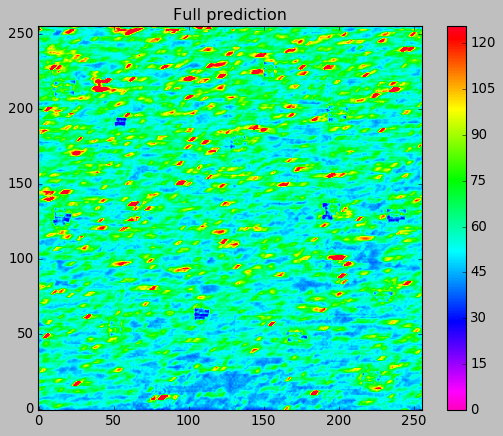

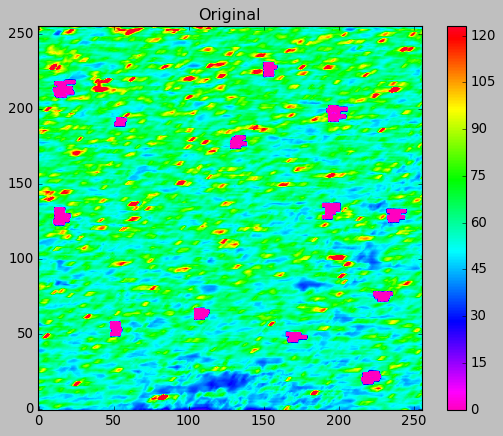

In [45]:
plot(full,'Full prediction')
plot(fullog,'Original')
#plot(fulltar,'Bicubic Interpolator')

In [46]:
print('original 1 mean: ', fullog.values.mean()/250,'standard devaition: ', fullog.values.std()/250)
#print('target 1 mean: ', fulltar.values.mean()/250,'standard devaition: ', fulltar.values.std()/250)
print('Pred 1 mean: ', full.values.mean()/250,'standard devaition: ', full.values.std()/250)
print('original 1 max: ', fullog.values.max()/250, ' min: ',fullog.values.min()/250)
#print('target 1 max: ', fulltar.values.max()/250, ' min: ',fulltar.values.min()/250)
print('pred 1 max: ', full.values.max()/250, ' min: ',full.values.min()/250)

original 1 mean:  0.24642256641244176 standard devaition:  0.08325746945832542
Pred 1 mean:  0.2517518182472239 standard devaition:  0.06822014048823462
original 1 max:  3.0356983280181886  min:  -0.3294442069530487
pred 1 max:  1.0198774945735931  min:  0.07421162903308869


In [47]:
def plot_images(src_img, gen_img, tar_img):
    images = vstack((src_img, gen_img, tar_img))
    # scale from [-1,1] to [0,1]
    images = (images + 1) / 2.0
    titles = ['Source', 'Generated', 'Expected']
    # plot images row by row
    for i in range(len(images)):
        # define subplot
        pyplot.subplot(2, 3, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        # show title

        pyplot.title(titles[i])
        vmin = np.min(images[i].any())
        vmax = np.max(images[i].any())
        sigma =  np.std(images[i])
        miu= np.mean(images[i])
        norm = colors.Normalize(vmin=vmin, vmax=vmax)
        plt.style.use('classic')    
        color_map = plt.cm.get_cmap('gist_rainbow').reversed()
        pyplot.imshow(images[i][:,:,0], cmap=plt.cm.get_cmap(name=color_map), norm=norm, aspect=None, interpolation=None, alpha=None,
                             vmin=0, vmax=miu*2, origin=None, extent=None,filternorm=True,
                             filterrad=4.0)
        plt.colorbar()
        plt.gca().invert_yaxis()
    pyplot.show()

In [48]:
# plot all three images
#plot_images(fullog, full, fulltar)

In [49]:
src_image=src_image*127.5 + 127.5
src_image

array([[[[ 60.418106 ],
         [ 66.09444  ],
         [ 67.46075  ],
         ...,
         [ 58.0849   ],
         [ 57.28186  ],
         [ 56.71826  ]],

        [[ 60.256393 ],
         [ 62.092354 ],
         [ 62.819145 ],
         ...,
         [102.501396 ],
         [ 82.73429  ],
         [ 63.19113  ]],

        [[ 78.84531  ],
         [ 76.42736  ],
         [ 78.26317  ],
         ...,
         [116.659615 ],
         [109.7308   ],
         [ 87.04402  ]],

        ...,

        [[ 57.96926  ],
         [ 57.82981  ],
         [ 58.93077  ],
         ...,
         [ 70.08344  ],
         [ 68.51933  ],
         [ 61.77484  ]],

        [[ 59.560936 ],
         [ 56.43934  ],
         [ 57.126114 ],
         ...,
         [ 65.678276 ],
         [ 65.6925   ],
         [ 61.972435 ]],

        [[ 57.02127  ],
         [ 56.77758  ],
         [ 55.031525 ],
         ...,
         [-18.55075  ],
         [ 15.364296 ],
         [ -2.2716217]]]], dtype=float32)

In [50]:
from os import listdir
listdir(r'C:\Users\gbian007\Google Drive\Research\ModMap\data\raw_validation_data_metallic')

['Al-1hBN_U30_1.csv',
 'Al-1hBN_U30_10.csv',
 'Al-1hBN_U30_11.csv',
 'Al-1hBN_U30_12.csv',
 'Al-1hBN_U30_13.csv',
 'Al-1hBN_U30_14.csv',
 'Al-1hBN_U30_15.csv',
 'Al-1hBN_U30_16.csv',
 'Al-1hBN_U30_2.csv',
 'Al-1hBN_U30_3.csv',
 'Al-1hBN_U30_4.csv',
 'Al-1hBN_U30_5.csv',
 'Al-1hBN_U30_6.csv',
 'Al-1hBN_U30_7.csv',
 'Al-1hBN_U30_8.csv',
 'Al-1hBN_U30_9.csv',
 'AlWS2U0_50by50_270_1.csv',
 'AlWS2U0_50by50_270_10.csv',
 'AlWS2U0_50by50_270_11.csv',
 'AlWS2U0_50by50_270_12.csv',
 'AlWS2U0_50by50_270_13.csv',
 'AlWS2U0_50by50_270_14.csv',
 'AlWS2U0_50by50_270_15.csv',
 'AlWS2U0_50by50_270_16.csv',
 'AlWS2U0_50by50_270_2.csv',
 'AlWS2U0_50by50_270_3.csv',
 'AlWS2U0_50by50_270_4.csv',
 'AlWS2U0_50by50_270_5.csv',
 'AlWS2U0_50by50_270_6.csv',
 'AlWS2U0_50by50_270_7.csv',
 'AlWS2U0_50by50_270_8.csv',
 'AlWS2U0_50by50_270_9.csv']

In [51]:
full = np.empty([256,256])
full[:64,:64] = prediction[16,:,:,0]*127.5 + 127.5 #row 1 0:63
full[:64,64:128] = prediction[24,:,:,0]*127.5 + 127.5 #Row 1 64:128
full[:64,128:192] = prediction[25,:,:,0]*127.5 + 127.5 #Row 1 128:192
full[:64,192:256] = prediction[26,:,:,0]*127.5 + 127.5 #Row 1 192:256

full[64:128,:64] = prediction[27,:,:,0]*127.5 + 127.5 #row 2 0-63
full[64:128,64:128] = prediction[28,:,:,0]*127.5 + 127.5 #row 2 64:128
full[64:128,128:192] = prediction[29,:,:,0]*127.5 + 127.5 #row 2 128:192
full[64:128,192:256] = prediction[30,:,:,0]*127.5 + 127.5 #row 2 192:256

full[128:192,:64] = prediction[31,:,:,0]*127.5 + 127.5 #row 3 0-63
full[128:192,64:128] = prediction[17,:,:,0]*127.5 + 127.5 #row 3 64:128
full[128:192,128:192] = prediction[18,:,:,0]*127.5 + 127.5 #row 3 128:192
full[128:192,192:256] = prediction[19,:,:,0]*127.5 + 127.5 #row 3 192:256

full[192:256,:64] = prediction[20,:,:,0]*127.5 + 127.5 #row 4 0-63
full[192:256,64:128] = prediction[21,:,:,0]*127.5 + 127.5 #row 4 64:128
full[192:256,128:192] = prediction[22,:,:,0]*127.5 + 127.5 #row 4 128:192
full[192:256,192:256] = prediction[23,:,:,0]*127.5 + 127.5 #row 4 192:256
full=pd.DataFrame(full)
full.to_csv(r'C:\Users\gbian007\Google Drive\Research\ModMap\data\Analysis\full2.csv',header=False,index=False)


In [52]:
fullog = np.empty([256,256])
fullog[:64,:64] = np.reshape(X1[16].squeeze()*127.5 + 127.5, (64,64)) #row 1 0:63
fullog[:64,64:128] = np.reshape(X1[24].squeeze()*127.5 + 127.5, (64,64)) #Row 1 64:128
fullog[:64,128:192] = np.reshape(X1[25].squeeze()*127.5 + 127.5, (64,64)) #Row 1 128:192
fullog[:64,192:256] = np.reshape(X1[26].squeeze()*127.5 + 127.5, (64,64)) #Row 1 192:256

fullog[64:128,:64] = np.reshape(X1[27].squeeze()*127.5 + 127.5, (64,64)) #row 2 0-63
fullog[64:128,64:128] = np.reshape(X1[28].squeeze()*127.5 + 127.5, (64,64)) #row 2 64:128
fullog[64:128,128:192] = np.reshape(X1[29].squeeze()*127.5 + 127.5, (64,64)) #row 2 128:192
fullog[64:128,192:256] = np.reshape(X1[30].squeeze()*127.5 + 127.5, (64,64)) #row 2 192:256

fullog[128:192,:64] = np.reshape(X1[31].squeeze()*127.5 + 127.5, (64,64)) #row 3 0-63
fullog[128:192,64:128] = np.reshape(X1[17].squeeze()*127.5 + 127.5, (64,64)) #row 3 64:128
fullog[128:192,128:192] = np.reshape(X1[18].squeeze()*127.5 + 127.5, (64,64)) #row 3 128:192
fullog[128:192,192:256] = np.reshape(X1[19].squeeze()*127.5 + 127.5, (64,64)) #row 3 192:256

fullog[192:256,:64] = np.reshape(X1[20].squeeze()*127.5 + 127.5, (64,64)) #row 4 0-63
fullog[192:256,64:128] = np.reshape(X1[21].squeeze()*127.5 + 127.5, (64,64)) #row 4 64:128
fullog[192:256,128:192] = np.reshape(X1[22].squeeze()*127.5 + 127.5, (64,64)) #row 4 128:192
fullog[192:256,192:256] = np.reshape(X1[23].squeeze()*127.5 + 127.5, (64,64)) #row 4 192:256
fullog=pd.DataFrame(fullog)
fullog.to_csv(r'C:\Users\gbian007\Google Drive\Research\ModMap\data\Analysis\fullog2.csv',header=False,index=False)


In [53]:
fulltar = np.empty([256,256])
fulltar[:64,:64] = np.reshape(X2[16].squeeze()*127.5 + 127.5, (64,64)) #row 1 0:63
fulltar[:64,64:128] = np.reshape(X2[24].squeeze()*127.5 + 127.5, (64,64)) #Row 1 64:128
fulltar[:64,128:192] = np.reshape(X2[25].squeeze()*127.5 + 127.5, (64,64)) #Row 1 128:192
fulltar[:64,192:256] = np.reshape(X2[26].squeeze()*127.5 + 127.5, (64,64)) #Row 1 192:256

fulltar[64:128,:64] = np.reshape(X2[27].squeeze()*127.5 + 127.5, (64,64)) #row 2 0-63
fulltar[64:128,64:128] = np.reshape(X2[28].squeeze()*127.5 + 127.5, (64,64)) #row 2 64:128
fulltar[64:128,128:192] = np.reshape(X2[29].squeeze()*127.5 + 127.5, (64,64)) #row 2 128:192
fulltar[64:128,192:256] = np.reshape(X2[30].squeeze()*127.5 + 127.5, (64,64)) #row 2 192:256

fulltar[128:192,:64] = np.reshape(X2[31].squeeze()*127.5 + 127.5, (64,64)) #row 3 0-63
fulltar[128:192,64:128] = np.reshape(X2[17].squeeze()*127.5 + 127.5, (64,64)) #row 3 64:128
fulltar[128:192,128:192] = np.reshape(X2[18].squeeze()*127.5 + 127.5, (64,64)) #row 3 128:192
fulltar[128:192,192:256] = np.reshape(X2[19].squeeze()*127.5 + 127.5, (64,64)) #row 3 192:256

fulltar[192:256,:64] = np.reshape(X2[20].squeeze()*127.5 + 127.5, (64,64)) #row 4 0-63
fulltar[192:256,64:128] = np.reshape(X2[21].squeeze()*127.5 + 127.5, (64,64)) #row 4 64:128
fulltar[192:256,128:192] = np.reshape(X2[22].squeeze()*127.5 + 127.5, (64,64)) #row 4 128:192
fulltar[192:256,192:256] = np.reshape(X2[23].squeeze()*127.5 + 127.5, (64,64)) #row 4 192:256


fulltar=pd.DataFrame(fulltar)
fulltar.to_csv(r'C:\Users\gbian007\Google Drive\Research\ModMap\data\Analysis\fulltar2.csv',header=False,index=False)


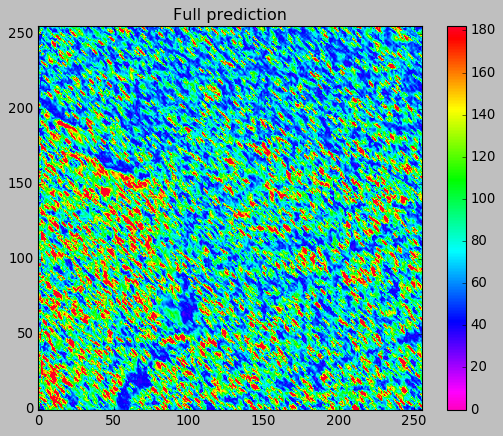

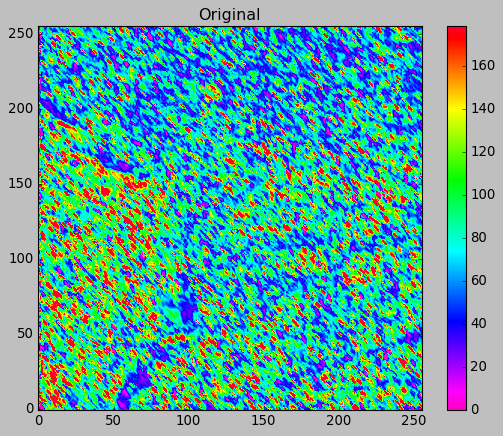

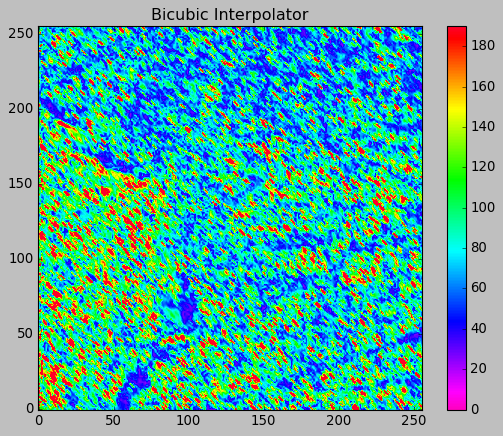

In [54]:
plot(full,'Full prediction')
plot(fullog,'Original')
plot(fulltar,'Bicubic Interpolator')

In [55]:
print('original 1: mean: ', fullog.values.mean()/250,', Std: ', fullog.values.std()/250)
print('target 1: mean: ', fulltar.values.mean()/250,', Std: ', fulltar.values.std()/250)
print('Pred 1: mean: ', full.values.mean()/250,', Std: ', full.values.std()/250)
print('original 1 max: ', fullog.values.max()/250, ' min: ',fullog.values.min()/250)
print('target 1 max: ', fulltar.values.max()/250, ' min: ',fulltar.values.min()/250)
print('pred 1 max: ', full.values.max()/250, ' min: ',full.values.min()/250)

original 1: mean:  0.35790342691075056 , Std:  0.3086545583822657
target 1: mean:  0.3804741593948565 , Std:  0.2952377344589253
Pred 1: mean:  0.3646642472404055 , Std:  0.20815825335333546
original 1 max:  14.84693359375  min:  -1.1049498291015625
target 1 max:  14.84693359375  min:  0.09693701171875
pred 1 max:  1.02  min:  0.012808563232421875


In [ ]:
import sklearn
sklearn.metrics.mean_absolute_error(fulltar.squeeze(), full.squeeze(), sample_weight=None, multioutput='uniform_average')